<a href="https://colab.research.google.com/github/Bilol2747/python_darslarim/blob/main/Regressiya_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [ ]:
df.describe()

,rooms,size,level,max_levels,price
count,7278.000000,7278.00000,7278.000000,7278.000000,7278.000000
mean,2.578318,70.11898,3.689338,5.992718,54092.074196
std,1.030179,29.32120,2.228360,2.583194,29665.210900
min,1.000000,1.00000,1.000000,1.000000,2.000000
25%,2.000000,50.00000,2.000000,4.000000,34800.000000
50%,2.000000,65.00000,3.000000,5.000000,45500.000000
75%,3.000000,83.00000,5.000000,9.000000,65000.000000
max,8.000000,279.00000,18.000000,25.000000,220000.000000


In [ ]:
df.shape

(7278, 6)

In [ ]:
df.district.value_counts()

,count
district,
Чиланзарский,1616
Мирзо-Улугбекский,1342
Учтепинский,872
Юнусабадский,847
Мирабадский,717
Яккасарайский,628
Яшнободский,456
Шайхантахурский,356
Олмазорский,262


In [ ]:
housing= df[df.district=='Чиланзарский']

In [ ]:
housing

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
...,...,...,...,...,...,...
7404,Чиланзарский,3,70.0,3,4,48000.0
7422,Чиланзарский,1,20.0,5,5,18500.0
7433,Чиланзарский,1,32.0,3,4,28000.0
7445,Чиланзарский,3,70.0,1,4,49800.0


In [ ]:
x= housing['size'].to_numpy()

In [ ]:
x

array([42., 65., 70., ..., 32., 70., 30.])

In [ ]:
y=housing['price'].to_numpy()

In [ ]:
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

In [ ]:
from re import I
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

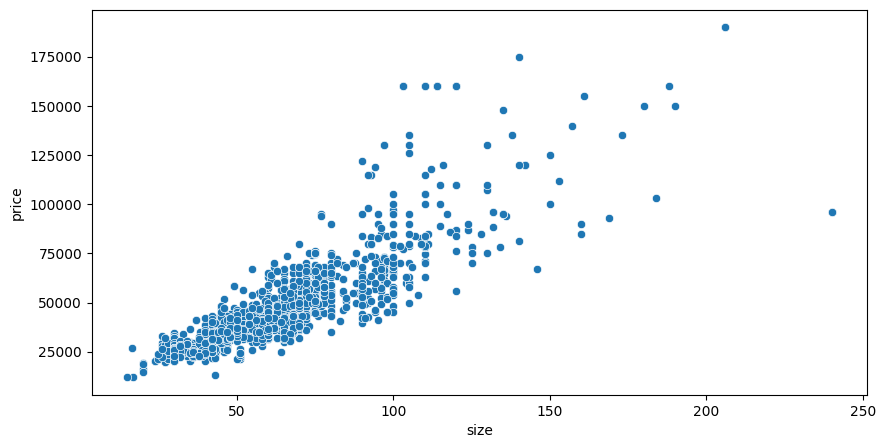

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

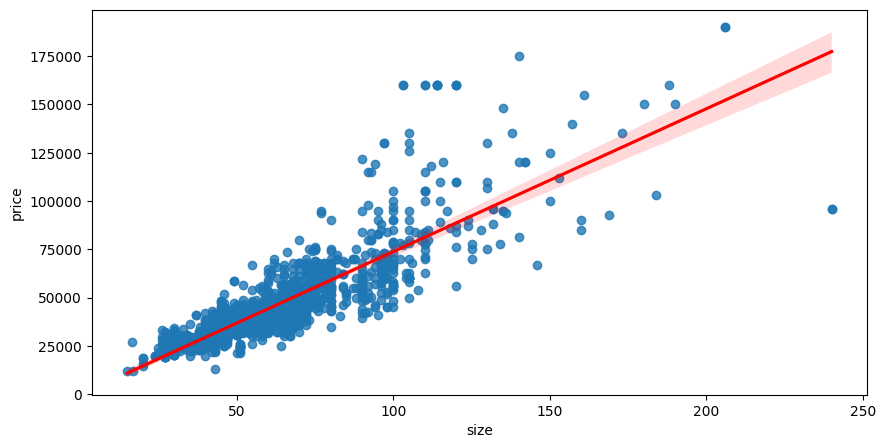

In [ ]:
plt.figure(figsize=(10, 5))
sns.regplot(data=housing, x='size', y='price', line_kws={'color': 'red'})
plt.show()

In [ ]:
import numpy as np

xmean = np.mean(x)
ymean = np.mean(y)

In [ ]:
data1= sum((x-xmean)*(y-ymean)/sum((x-xmean)**2))
print(f"{data1=}")

data1=740.0264822713299


In [ ]:
data0=ymean-data1*xmean
print(f"{data0=}")

data0=-195.9491135269709


In [ ]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")

x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [ ]:
y_predict = data0 + data1*x_test
print(f"{y_predict=}")

y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


In [ ]:
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=4140.350316347146


In [ ]:
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=5882.051673173716


In [ ]:
housing.shape

(1616, 6)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size=0.1, random_state=54)

In [ ]:
test_set.shape

(162, 6)

In [ ]:
from sklearn import linear_model
lr_model = linear_model.LinearRegression()
x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])
lr_model.fit(x_train, y_train)
theta1 = lr_model.coef_[0][0]
theta0 = lr_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')


theta1=735.0394945345356
theta0=47.36005523530184


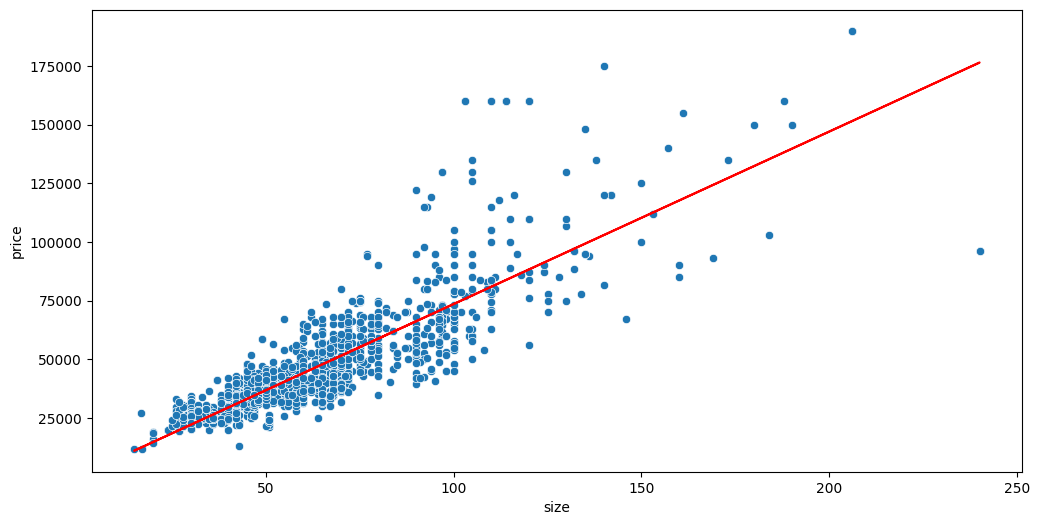

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=housing, x='size', y= 'price')
plt.plot(x_train, theta0+ theta1*x_train, '-r')
plt.show()

In [ ]:
x_test=np.asanyarray(test_set[['size']])
y_test=np.asanyarray(test_set[['price']])

In [ ]:
y_predict=lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE=mean_absolute_error(y_test, y_predict)
MSE= np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{MSE=}")

MAE=7266.613581907162
MSE=12101.497830865681


#Amaliyot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
df.corrwith(df['Sales'])

,0
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


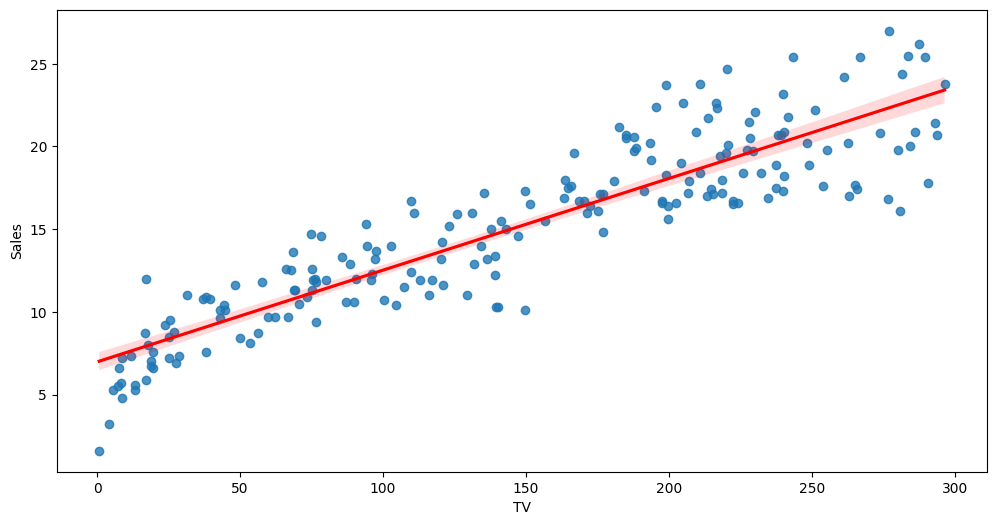

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='TV', y='Sales', line_kws={'color': 'red'})
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
x_train=np.asanyarray(df[['TV']])
y_train=np.asanyarray(df[['Sales']])

In [ ]:
lr_model.fit(x_train, y_train)
theta1=lr_model.coef_[0][0]
theta0= lr_model.intercept_[0]
print(f"{theta1=}")
print(f"{theta0=}")

theta1=0.055464770469558874
theta0=6.974821488229891


In [ ]:
y_predict=lr_model.predict(x_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE=mean_absolute_error(y_train, y_predict)
RMAE=mean_squared_error(y_train, y_predict)
print(f'{MAE=}')
print(f'{RMAE=}')

MAE=1.8305872641932412
RMAE=5.2177438977951285
